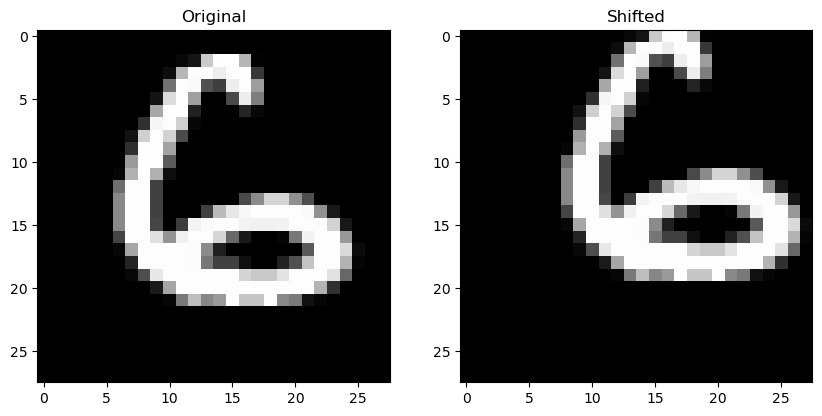

In [2]:
def shift_image(image, dx, dy):
    image = image.reshape(28, 28)
    shifted_image = shift(image, [dy, dx], cval=0)
    return shifted_image.reshape(-1)

sample_image = X_train[0]
shifted_sample = shift_image(sample_image, 2, -2) 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(sample_image.reshape(28, 28), cmap="gray")
plt.subplot(1, 2, 2)
plt.title("Shifted")
plt.imshow(shifted_sample.reshape(28, 28), cmap="gray")
plt.show()


In [3]:
def augment_data(X, y):
    augmented_X, augmented_y = [], []
    for image, label in zip(X, y):
        augmented_X.append(image)  
        augmented_X.append(shift_image(image, 0, 1))  
        augmented_X.append(shift_image(image, 0, -1))  
        augmented_X.append(shift_image(image, 1, 0))  
        augmented_X.append(shift_image(image, -1, 0))  
        augmented_y.extend([label] * 5)  
    return np.array(augmented_X), np.array(augmented_y)

X_train_augmented, y_train_augmented = augment_data(X_train, y_train)


In [4]:

knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train, y_train)
original_accuracy = knn.score(X_test, y_test)
print(f"Original Accuracy: {original_accuracy:.2%}")


knn.fit(X_train_augmented, y_train_augmented)
augmented_accuracy = knn.score(X_test, y_test)
print(f"Augmented Accuracy: {augmented_accuracy:.2%}")


Original Accuracy: 97.35%
Augmented Accuracy: 97.93%


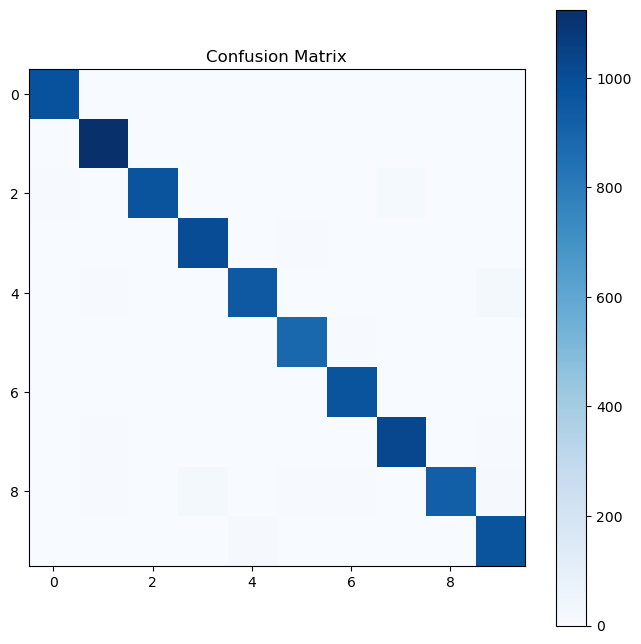

Precision: 97.96%
Recall: 97.90%
F1-Score: 97.92%


In [7]:


y_pred = knn.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
plt.title("Confusion Matrix")
plt.imshow(cm, cmap="Blues")
plt.colorbar()
plt.show()


precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1-Score: {f1:.2%}")